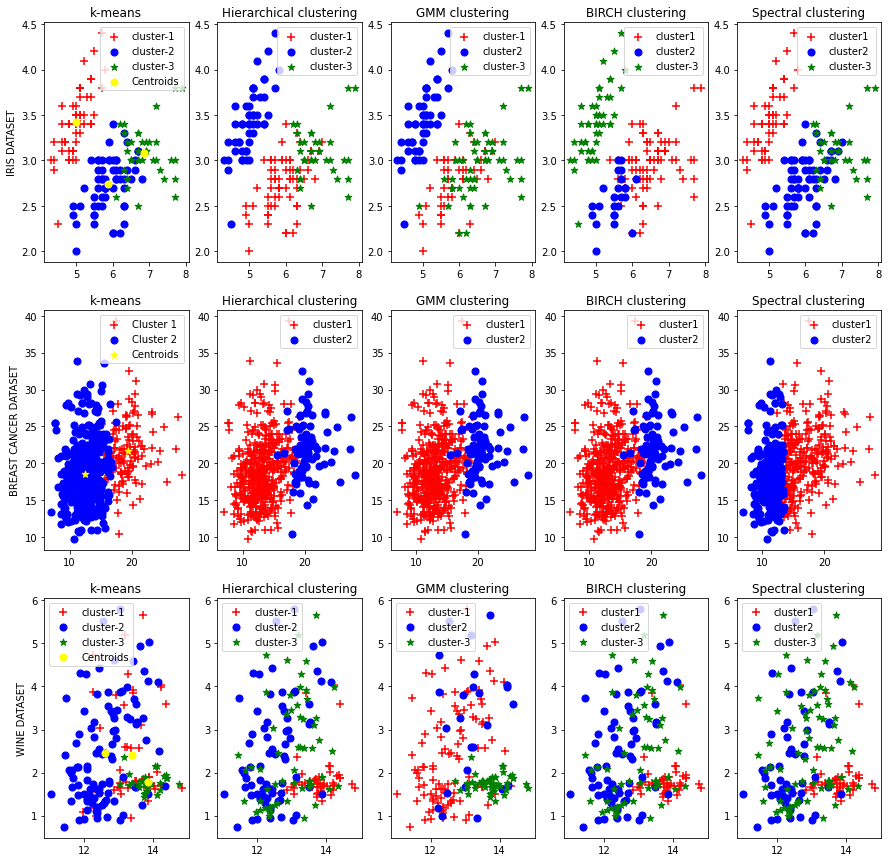

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
iris = datasets.load_iris()

X = iris.data
y = iris.target
NMI_Iris_all=[]
NMI_Cancer_all=[]
NMI_Wine_all=[]

f, ax = plt.subplots(3, 5, figsize=(15,15))
ax[0,0].title.set_text('k-means')
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

nmi=normalized_mutual_info_score(y,y_kmeans)
NMI_Iris_all.append(nmi)

ax[0,0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[0,0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[0,0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
# #Plotting the centroids of the clusters
ax[0,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

ax[0,0].legend()
ax[0,0].set_ylabel('IRIS DATASET')

from sklearn.cluster import AgglomerativeClustering
groups=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X)

nmi=normalized_mutual_info_score(y,groups)
NMI_Iris_all.append(nmi)

ax[0,1].title.set_text('Hierarchical clustering')
ax[0,1].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[0,1].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[0,1].scatter(X[groups == 2, 0], X[groups == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
ax[0,1].legend()


from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 3)
gmm = gmm.fit(X)
pred_gmm = gmm.predict(X)

nmi=normalized_mutual_info_score(y,pred_gmm)
NMI_Iris_all.append(nmi)

ax[0,2].title.set_text('GMM clustering')
ax[0,2].scatter(X[pred_gmm == 0, 0], X[pred_gmm == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster-1')
ax[0,2].scatter(X[pred_gmm == 1, 0], X[pred_gmm == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,2].scatter(X[pred_gmm == 2, 0], X[pred_gmm == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')

ax[0,2].legend()


from sklearn.cluster import Birch
brc = Birch(n_clusters=3)
brc.fit(X)
brc=brc.predict(X)

nmi=normalized_mutual_info_score(y,brc)
NMI_Iris_all.append(nmi)

ax[0,3].title.set_text('BIRCH clustering')
ax[0,3].scatter(X[brc == 0, 0], X[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[0,3].scatter(X[brc == 1, 0], X[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,3].scatter(X[brc == 2, 0], X[brc == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[0,3].legend()


# spectral clustering
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
model = SpectralClustering(n_clusters=3)
yhat = model.fit_predict(X)

nmi=normalized_mutual_info_score(y,yhat)
NMI_Iris_all.append(nmi)

ax[0,4].title.set_text('Spectral clustering')
ax[0,4].scatter(X[yhat == 0, 0], X[yhat == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[0,4].scatter(X[yhat == 1, 0], X[yhat == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,4].scatter(X[yhat == 2, 0], X[yhat == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[0,4].legend()



from sklearn.datasets import load_breast_cancer
cancerData = load_breast_cancer()
X= cancerData.data
y = cancerData.target


kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

nmi=normalized_mutual_info_score(y,y_kmeans)
NMI_Cancer_all.append(nmi)

ax[1,0].title.set_text('k-means')
ax[1,0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', marker='+',label = 'Cluster 1')
ax[1,0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', marker='o',label = 'Cluster 2')
ax[1,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow',marker='*', label = 'Centroids')

ax[1,0].legend()
ax[1,0].set_ylabel('BREAST CANCER DATASET')

groups=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X)

nmi=normalized_mutual_info_score(y,groups)
NMI_Cancer_all.append(nmi)

ax[1,1].title.set_text('Hierarchical clustering')
ax[1,1].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,1].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue', marker='o',label = 'cluster2')
ax[1,1].legend()

gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X)

nmi=normalized_mutual_info_score(y,y_cluster_gmm)
NMI_Cancer_all.append(nmi)

ax[1,2].title.set_text('GMM clustering')
ax[1,2].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red', marker='+',label = 'cluster1')
ax[1,2].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue', marker='o',label = 'cluster2')
ax[1,2].legend()

brc = Birch(n_clusters=2)
brc.fit(X)
brc=brc.predict(X)

nmi=normalized_mutual_info_score(y,brc)
NMI_Cancer_all.append(nmi)

ax[1,3].title.set_text('BIRCH clustering')
ax[1,3].scatter(X[brc == 0, 0], X[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,3].scatter(X[brc == 1, 0], X[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[1,3].legend()


# spectral clustering
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors')
yhat = model.fit_predict(X)

nmi=normalized_mutual_info_score(y,yhat)
NMI_Cancer_all.append(nmi)

ax[1,4].title.set_text('Spectral clustering')
ax[1,4].scatter(X[yhat == 0, 0], X[yhat == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,4].scatter(X[yhat == 1, 0], X[yhat == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[1,4].legend()




from sklearn.datasets import load_wine
wine=load_wine()
X = wine.data
y = wine.target

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

nmi=normalized_mutual_info_score(y,y_kmeans)
NMI_Wine_all.append(nmi)

ax[2,0].title.set_text('k-means')
ax[2,0].scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[2,0].scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[2,0].scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
# #Plotting the centroids of the clusters
ax[2,0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

ax[2,0].legend()
ax[2,0].set_ylabel('WINE DATASET')


groups=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X)

nmi=normalized_mutual_info_score(y,groups)
NMI_Wine_all.append(nmi)

ax[2,1].title.set_text('Hierarchical clustering')
ax[2,1].scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[2,1].scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[2,1].scatter(X[groups == 2, 0], X[groups == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
ax[2,1].legend()


gmm = mixture.GaussianMixture(n_components = 3)
gmm = gmm.fit(X)
pred_gmm = gmm.predict(X)

nmi=normalized_mutual_info_score(y,pred_gmm)
NMI_Wine_all.append(nmi)

ax[2,2].title.set_text('GMM clustering')
ax[2,2].scatter(X[pred_gmm == 0, 0], X[pred_gmm == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster-1')
ax[2,2].scatter(X[pred_gmm == 1, 0], X[pred_gmm == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,2].scatter(X[pred_gmm == 2, 0], X[pred_gmm == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,2].legend()

brc = Birch(n_clusters=3)
brc.fit(X)
brc=brc.predict(X)

nmi=normalized_mutual_info_score(y,brc)
NMI_Wine_all.append(nmi)

ax[2,3].title.set_text('BIRCH clustering')
ax[2,3].scatter(X[brc == 0, 0], X[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[2,3].scatter(X[brc == 1, 0], X[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,3].scatter(X[brc == 2, 0], X[brc == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,3].legend()


# spectral clustering
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors')
yhat = model.fit_predict(X)

nmi=normalized_mutual_info_score(y,yhat)
NMI_Wine_all.append(nmi)

ax[2,4].title.set_text('Spectral clustering')
ax[2,4].scatter(X[yhat == 0, 0], X[yhat == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[2,4].scatter(X[yhat == 1, 0], X[yhat == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,4].scatter(X[yhat == 2, 0], X[yhat == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,4].legend()


In [15]:
NMI_Cancer_all

[0.46479332792160793,
 0.31908185424236946,
 0.7061254214484896,
 0.31908185424236946,
 0.4171381784196669]

In [16]:
NMI_Iris_all

[0.7419116631817836,
 0.770083661648787,
 0.8996935451597475,
 0.7050989012575004,
 0.7979885217013319]

In [17]:
NMI_Wine_all

[0.423309269344735,
 0.4160766539899293,
 0.5165248571923309,
 0.4160766539899293,
 0.4199229706289377]

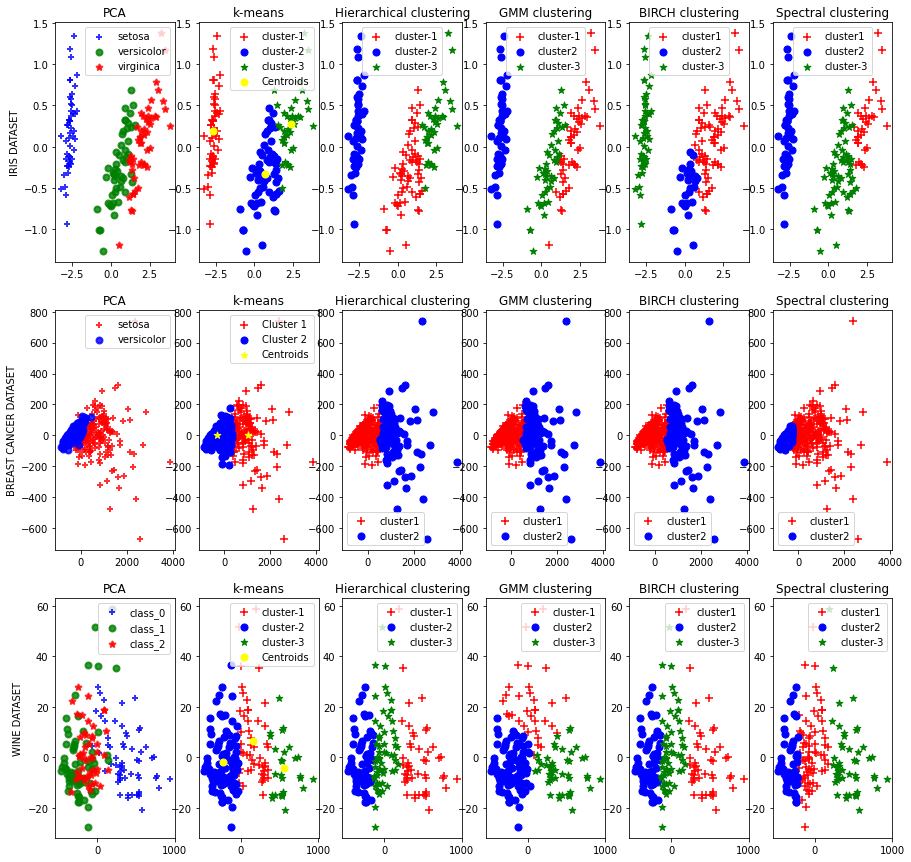

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

NMI_Iris_pca=[]
NMI_Cancer_pca=[]
NMI_Wine_pca=[]

f, ax = plt.subplots(3, 6, figsize=(15,15))

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
colors = ['blue', 'green', 'red']
markers=['+','o','*']
lw = 2
target_names = iris.target_names
for marker, color, i, target_name in zip(markers,colors, [0,1,2], target_names):
    ax[0,0].scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw,
                label=target_name)
ax[0,0].legend(loc='best', shadow=False, scatterpoints=1)
ax[0,0].title.set_text('PCA')
ax[0,0].set_ylabel('IRIS DATASET')

#K-means
ax[0,1].title.set_text('k-means')
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,y_kmeans)
NMI_Iris_pca.append(nmi)

ax[0,1].scatter(X_r[y_kmeans == 0, 0], X_r[y_kmeans == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[0,1].scatter(X_r[y_kmeans == 1, 0], X_r[y_kmeans == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[0,1].scatter(X_r[y_kmeans == 2, 0], X_r[y_kmeans == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
# #Plotting the centroids of the clusters
ax[0,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

ax[0,1].legend()

#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
groups=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,groups)
NMI_Iris_pca.append(nmi)

ax[0,2].title.set_text('Hierarchical clustering')
ax[0,2].scatter(X_r[groups == 0, 0], X_r[groups == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[0,2].scatter(X_r[groups == 1, 0], X_r[groups == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[0,2].scatter(X_r[groups == 2, 0], X_r[groups == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
ax[0,2].legend()

#GMM clustering
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 3)
gmm = gmm.fit(X_r)
pred_gmm = gmm.predict(X_r)

nmi=normalized_mutual_info_score(y,pred_gmm)
NMI_Iris_pca.append(nmi)

ax[0,3].title.set_text('GMM clustering')
ax[0,3].scatter(X_r[pred_gmm == 0, 0], X_r[pred_gmm == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster-1')
ax[0,3].scatter(X_r[pred_gmm == 1, 0], X_r[pred_gmm == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,3].scatter(X_r[pred_gmm == 2, 0], X_r[pred_gmm == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')

ax[0,3].legend()

#Birch clustering
from sklearn.cluster import Birch
brc = Birch(n_clusters=3)
brc.fit(X_r)
brc=brc.predict(X_r)

nmi=normalized_mutual_info_score(y,brc)
NMI_Iris_pca.append(nmi)

ax[0,4].title.set_text('BIRCH clustering')
ax[0,4].scatter(X_r[brc == 0, 0], X_r[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[0,4].scatter(X_r[brc == 1, 0], X_r[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,4].scatter(X_r[brc == 2, 0], X_r[brc == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[0,4].legend()


# spectral clustering
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
model = SpectralClustering(n_clusters=3)
yhat = model.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,yhat)
NMI_Iris_pca.append(nmi)

ax[0,5].title.set_text('Spectral clustering')
ax[0,5].scatter(X_r[yhat == 0, 0], X_r[yhat == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[0,5].scatter(X_r[yhat == 1, 0], X_r[yhat == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[0,5].scatter(X_r[yhat == 2, 0], X_r[yhat == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[0,5].legend()



#Breast cancer dataset 
from sklearn.datasets import load_breast_cancer
cancerData = load_breast_cancer()
X= cancerData.data
y = cancerData.target

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
colors = ['red', 'blue']

markers=['+','o']
lw = 2

for marker, color, i, target_name in zip(markers, colors, [0,1],target_names):
    ax[1,0].scatter(X_r[y == i, 0], X_r[y == i, 1], color=color,marker=marker, alpha=.8, lw=lw,
                label=target_name)
ax[1,0].legend(loc='best', shadow=False, scatterpoints=1)
ax[1,0].set_ylabel('BREAST CANCER DATASET')
ax[1,0].title.set_text('PCA')

#K-means
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,y_kmeans)
NMI_Cancer_pca.append(nmi)

ax[1,1].title.set_text('k-means')
ax[1,1].scatter(X_r[y_kmeans == 0, 0], X_r[y_kmeans == 0, 1], s = 50, c = 'red', marker='+',label = 'Cluster 1')
ax[1,1].scatter(X_r[y_kmeans == 1, 0], X_r[y_kmeans == 1, 1], s = 50, c = 'blue', marker='o',label = 'Cluster 2')
ax[1,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow',marker='*', label = 'Centroids')

ax[1,1].legend()

#Hierarchical clustering
groups=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,groups)
NMI_Cancer_pca.append(nmi)

ax[1,2].title.set_text('Hierarchical clustering')
ax[1,2].scatter(X_r[groups == 0, 0], X_r[groups == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,2].scatter(X_r[groups == 1, 0], X_r[groups == 1, 1], s = 50, c = 'blue', marker='o',label = 'cluster2')
ax[1,2].legend()

#GMM clustering
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(X_r)
y_cluster_gmm = gmm.predict(X_r)

nmi=normalized_mutual_info_score(y,y_cluster_gmm)
NMI_Cancer_pca.append(nmi)

ax[1,3].title.set_text('GMM clustering')
ax[1,3].scatter(X_r[groups == 0, 0], X_r[groups == 0, 1], s = 50, c = 'red', marker='+',label = 'cluster1')
ax[1,3].scatter(X_r[groups == 1, 0], X_r[groups == 1, 1], s = 50, c = 'blue', marker='o',label = 'cluster2')
ax[1,3].legend()

#Birch clustering
brc = Birch(n_clusters=2)
brc.fit(X_r)
brc=brc.predict(X_r)

nmi=normalized_mutual_info_score(y,brc)
NMI_Cancer_pca.append(nmi)

ax[1,4].title.set_text('BIRCH clustering')
ax[1,4].scatter(X_r[brc == 0, 0], X_r[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,4].scatter(X_r[brc == 1, 0], X_r[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[1,4].legend()

target_names = cancerData.target_names


# spectral clustering
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors')
yhat = model.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,yhat)
NMI_Cancer_pca.append(nmi)

ax[1,5].title.set_text('Spectral clustering')
ax[1,5].scatter(X_r[yhat == 0, 0], X_r[yhat == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[1,5].scatter(X_r[yhat == 1, 0], X_r[yhat == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[1,5].legend()



#Wine dataset
from sklearn.datasets import load_wine
wine=load_wine()
X = wine.data
y = wine.target

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
target_names = wine.target_names

colors = ['blue', 'green', 'red']
markers=['+','o','*']
lw = 2

for marker,color, i, target_name in zip(markers,colors, [0,1,2], target_names):
    ax[2,0].scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, marker=marker,alpha=.8, lw=lw,
                label=target_name)
ax[2,0].legend(loc='best', shadow=False, scatterpoints=1)
ax[2,0].set_ylabel('WINE DATASET')
ax[2,0].title.set_text('PCA')

#k-means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,y_kmeans)
NMI_Wine_pca.append(nmi)

ax[2,1].title.set_text('k-means')
ax[2,1].scatter(X_r[y_kmeans == 0, 0], X_r[y_kmeans == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[2,1].scatter(X_r[y_kmeans == 1, 0], X_r[y_kmeans == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[2,1].scatter(X_r[y_kmeans == 2, 0], X_r[y_kmeans == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
# #Plotting the centroids of the clusters
ax[2,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')

ax[2,1].legend()

#Hierarchical clustering
groups=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
groups=groups.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,groups)
NMI_Wine_pca.append(nmi)

ax[2,2].title.set_text('Hierarchical clustering')
ax[2,2].scatter(X_r[groups == 0, 0], X_r[groups == 0, 1], s = 50, c = 'red',marker='+', label = 'cluster-1')
ax[2,2].scatter(X_r[groups == 1, 0], X_r[groups == 1, 1], s = 50, c = 'blue',marker='o', label = 'cluster-2')
ax[2,2].scatter(X_r[groups == 2, 0], X_r[groups == 2, 1], s = 50, c = 'green',marker='*', label = 'cluster-3')
ax[2,2].legend()

#GMM clustering
gmm = mixture.GaussianMixture(n_components = 3)
gmm = gmm.fit(X_r)
pred_gmm = gmm.predict(X_r)

nmi=normalized_mutual_info_score(y,pred_gmm)
NMI_Wine_pca.append(nmi)

ax[2,3].title.set_text('GMM clustering')
ax[2,3].scatter(X_r[pred_gmm == 0, 0], X_r[pred_gmm == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster-1')
ax[2,3].scatter(X_r[pred_gmm == 1, 0], X_r[pred_gmm == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,3].scatter(X_r[pred_gmm == 2, 0], X_r[pred_gmm == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,3].legend()

#Birch clustering
brc = Birch(n_clusters=3)
brc.fit(X_r)
brc=brc.predict(X_r)

nmi=normalized_mutual_info_score(y,brc)
NMI_Wine_pca.append(nmi)

ax[2,4].title.set_text('BIRCH clustering')
ax[2,4].scatter(X_r[brc == 0, 0], X_r[brc == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[2,4].scatter(X_r[brc == 1, 0], X_r[brc == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,4].scatter(X_r[brc == 2, 0], X_r[brc == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,4].legend()


# spectral clustering
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors')
yhat = model.fit_predict(X_r)

nmi=normalized_mutual_info_score(y,yhat)
NMI_Wine_pca.append(nmi)

ax[2,5].title.set_text('Spectral clustering')
ax[2,5].scatter(X_r[yhat == 0, 0], X_r[yhat == 0, 1], s = 50, c = 'red', marker='+', label = 'cluster1')
ax[2,5].scatter(X_r[yhat == 1, 0], X_r[yhat == 1, 1], s = 50, c = 'blue', marker='o', label = 'cluster2')
ax[2,5].scatter(X_r[yhat == 2, 0], X_r[yhat == 2, 1], s = 50, c = 'green', marker='*', label = 'cluster-3')
ax[2,5].legend()


In [21]:
NMI_Cancer_pca

[0.46479332792160793,
 0.37192435551292596,
 0.6470261554158522,
 0.37192435551292596,
 0.414249928122293]

In [22]:
NMI_Iris_pca

[0.7419116631817836,
 0.7776631579462301,
 0.9305506621576433,
 0.7269866707832477,
 0.7979885217013319]

In [23]:
NMI_Wine_pca

[0.423309269344735,
 0.4160766539899293,
 0.38525916067995747,
 0.4160766539899293,
 0.41992297062893763]

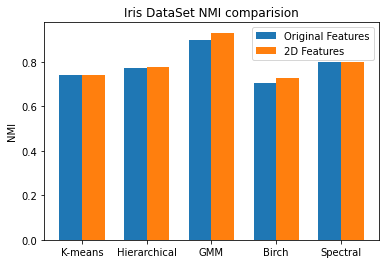

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['K-means', 'Hierarchical', 'GMM', 'Birch','Spectral']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NMI_Iris_all, width, label='Original Features')
rects2 = ax.bar(x + width/2, NMI_Iris_pca, width, label='2D Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('NMI')
ax.set_title('Iris DataSet NMI comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



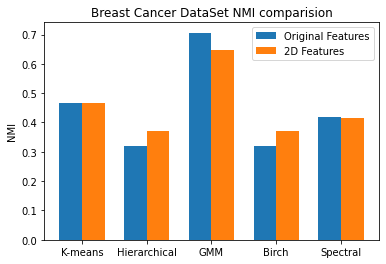

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['K-means', 'Hierarchical', 'GMM', 'Birch','Spectral']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NMI_Cancer_all, width, label='Original Features')
rects2 = ax.bar(x + width/2, NMI_Cancer_pca, width,label='2D Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('NMI')
ax.set_title('Breast Cancer DataSet NMI comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


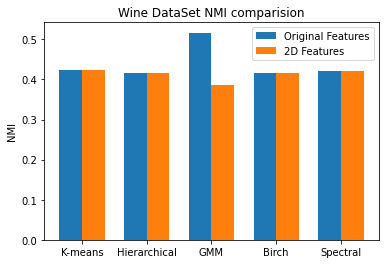

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['K-means', 'Hierarchical', 'GMM', 'Birch','Spectral']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NMI_Wine_all, width, label='Original Features')
rects2 = ax.bar(x + width/2, NMI_Wine_pca,width, label='2D Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('NMI')
ax.set_title('Wine DataSet NMI comparision')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()